In [1]:
import os
import pandas as pd
import matplotlib
import datetime, time
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

# Временно отключаем предупреждения
warnings.filterwarnings("ignore")

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_80257/781907981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Seasonal Climatology

In [2]:
def season_mean(ds, calendar='standard'):
    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = ds.time.dt.days_in_month

    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby('time.season') / month_length.groupby('time.season').sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby('time.season').sum(dim='time')

In [4]:
path = os.getcwd()
new_path = os.path.dirname(path)

PATH_DATA = new_path + '/data/'

In [5]:
filename_waves = PATH_DATA+'KLNG_ww3.1980_2019_hs.nc'
filename_wind = PATH_DATA+'ERA5_uv10m_Kaliningrad_wo29feb_daily.nc'
ds_bal = xr.open_dataset(filename_waves, decode_times=False)
ds_bal_wind = xr.open_dataset(filename_wind, decode_times=False)


# Decoding time
ds_bal = xr.decode_cf(ds_bal)

In [6]:
# ds_bal

In [7]:
np.max(ds_bal.hs)

<xarray.DataArray 'hs' ()>
array(7.545837, dtype=float32)

In [8]:
# ds_bal.time

In [9]:
# ds_bal.hs.isel(time=0).plot()

In [10]:
# ds_bal.t0m1.isel(time=0).plot()

In [11]:
%%time
ds_bal_season = season_mean(ds_bal)
# ds_bal_season = ds_bal.where(ds_ice_season != 0) # mask zeros as NaNs (for mask) ds_wspd_season.isel(latitude=slice(0,121))

CPU times: user 383 ms, sys: 304 ms, total: 687 ms
Wall time: 761 ms


In [12]:
# ds_bal_season

In [13]:
# ds_bal_season.t0m1.isel(season=0).plot()

CPU times: user 533 ms, sys: 118 ms, total: 651 ms
Wall time: 311 ms


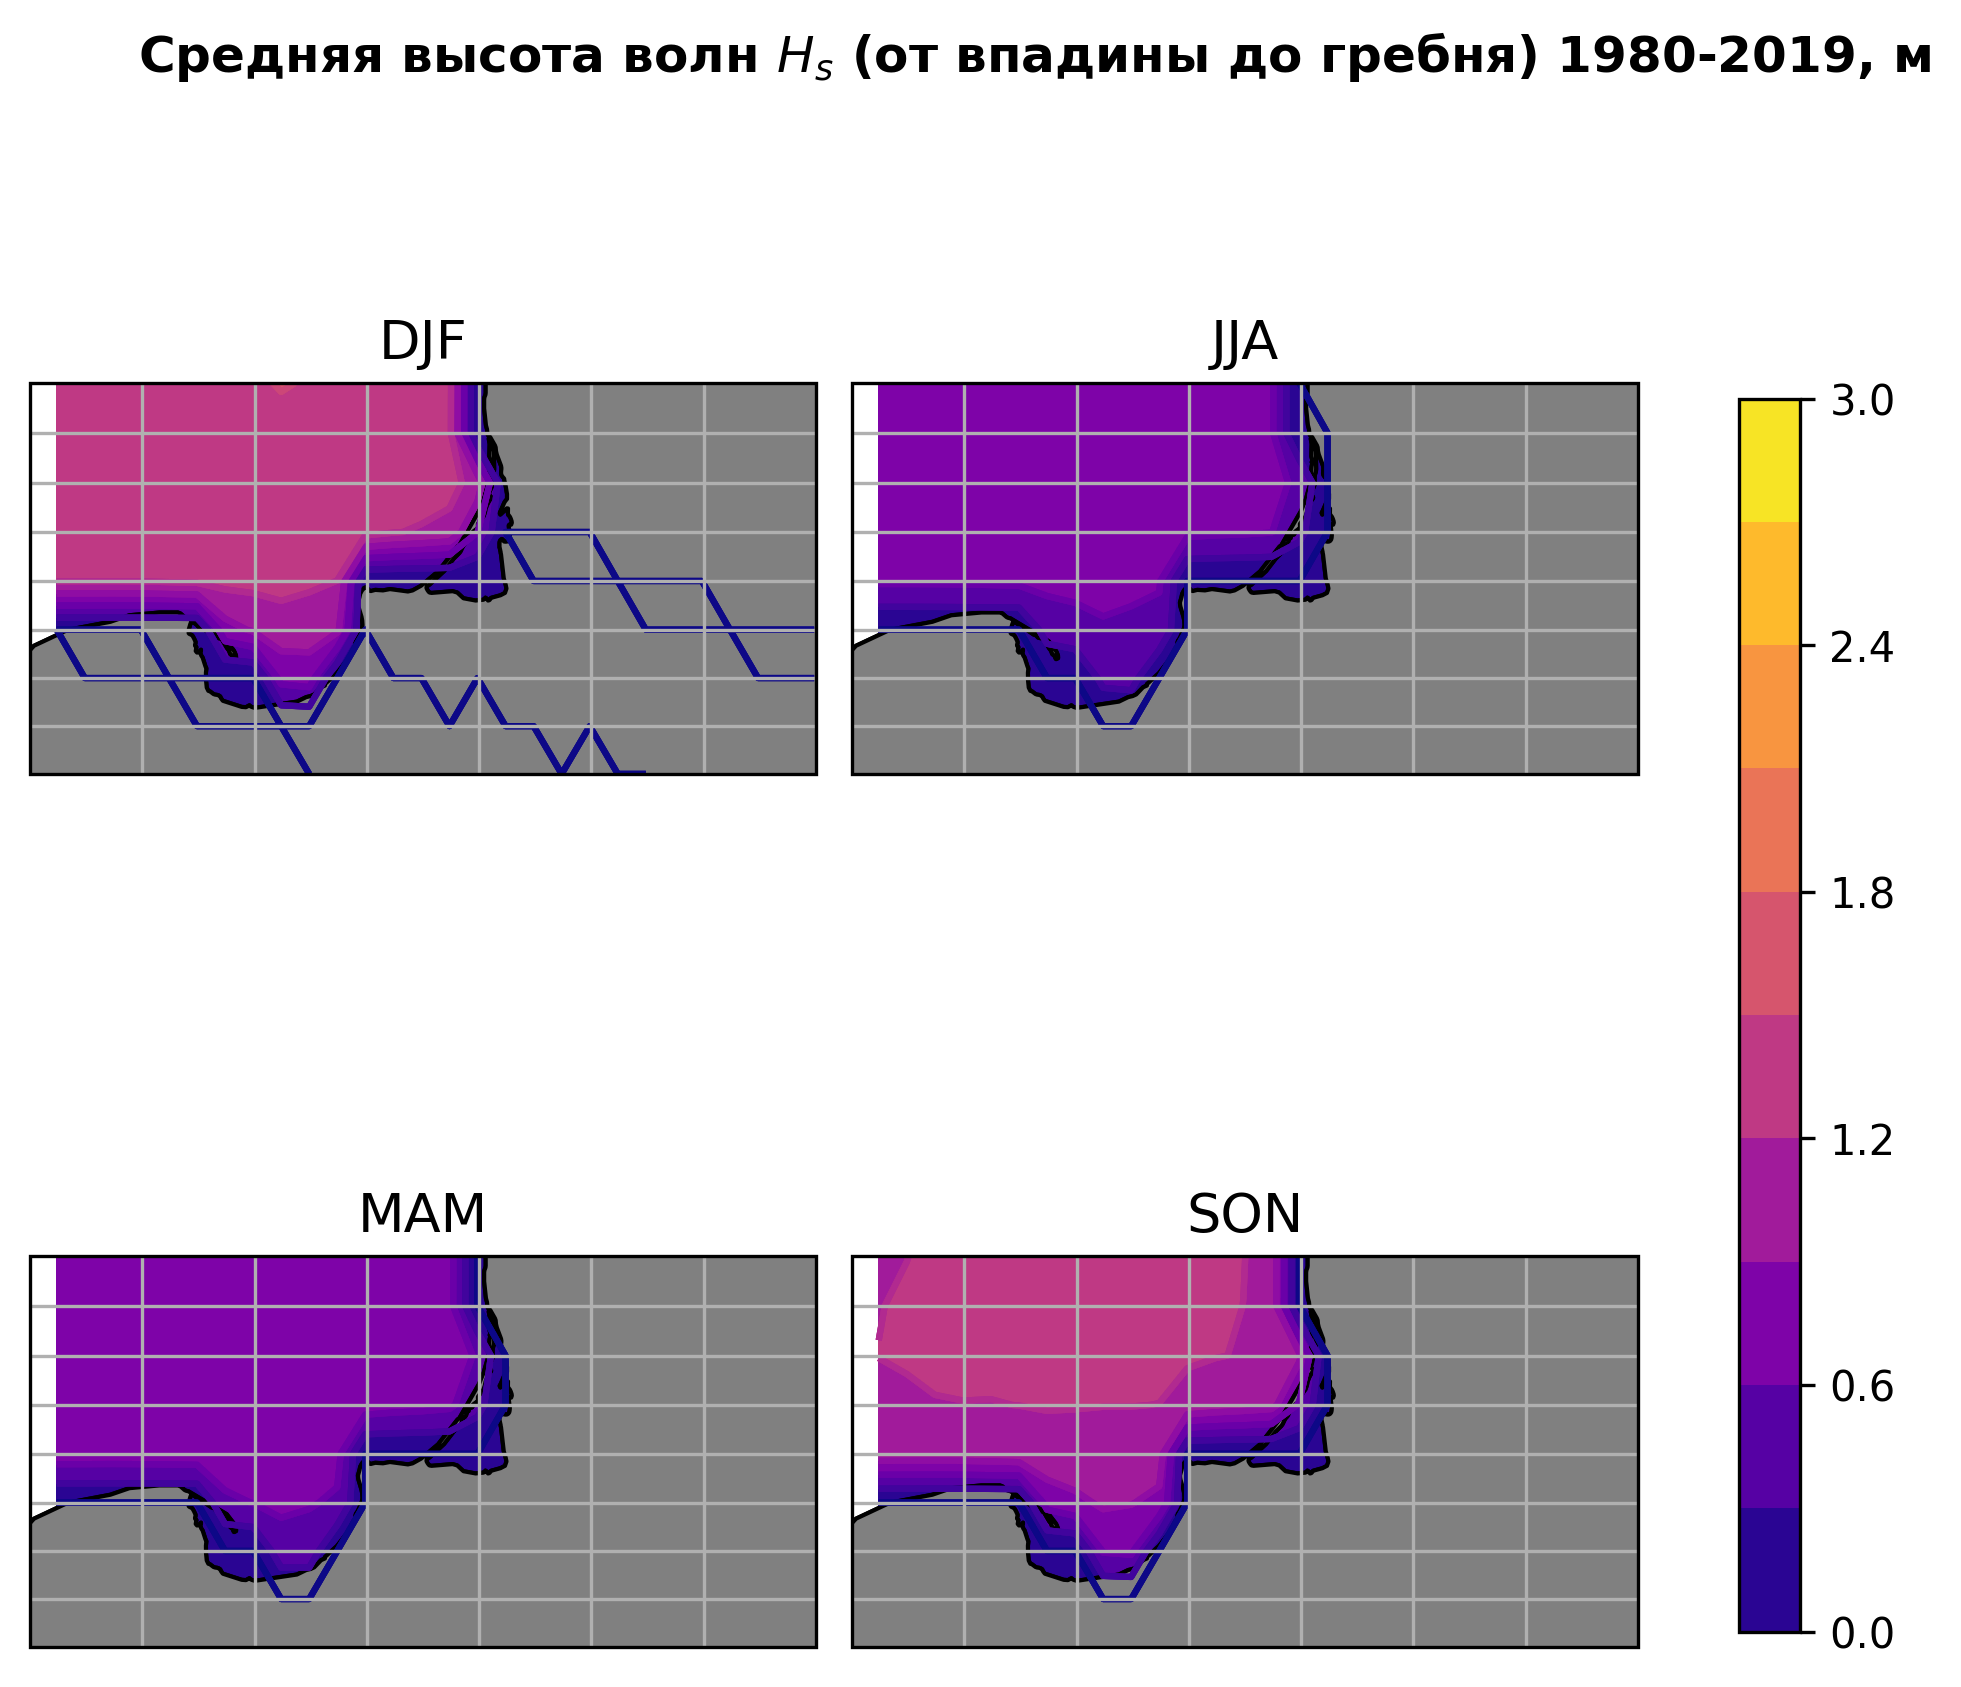

In [14]:
%%time

contour_levels = np.linspace(0., 3, 11)
# contour_levels_miz_015 = [0.15]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7), dpi=300,
                         subplot_kw={'projection': ccrs.Mercator()})

fig.subplots_adjust(hspace = .001, wspace=.05)

for i,ax in enumerate(axes.flatten()):
    #print(ax)
    ax.set_extent([17,24,54,56],crs=ccrs.PlateCarree())
    ax.coastlines()#resolution='110m',linewidth=0.5)
    ax.gridlines()
    ax.add_feature(cfeature.LAND, facecolor='grey', edgecolor='k',zorder=2)
#     ax.set_boundary(circle, transform=ax.transAxes)
    
    h = ax.contourf(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                    ds_bal_season.hs.isel(season=i), contour_levels, cmap='plasma', add_colorbar=False, transform=ccrs.PlateCarree())

    h015 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                      ds_bal_season.hs.isel(season=i), contour_levels, cmap='plasma', add_colorbar=False, transform=ccrs.PlateCarree())
    h08 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values, 
                      ds_bal_season.hs.isel(season=i), contour_levels, cmap='plasma', add_colorbar=False, transform=ccrs.PlateCarree())

    h05 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                    ds_bal_season.hs.isel(season=i), contour_levels, cmap='plasma', add_colorbar=False, transform=ccrs.PlateCarree())



    
    ax.set_title(ds_bal_season.season.values[i], fontsize=13)

fig.tight_layout()
fig.subplots_adjust(top=1)
fig.suptitle('Средняя высота волн $H_{s}$ (от впадины до гребня) 1980-2019, м', fontweight = 'bold')    
fig.colorbar(h, ax=axes.ravel().tolist(), shrink = 0.6)
    
#YlOrBr

CPU times: user 235 ms, sys: 6 ms, total: 240 ms
Wall time: 198 ms


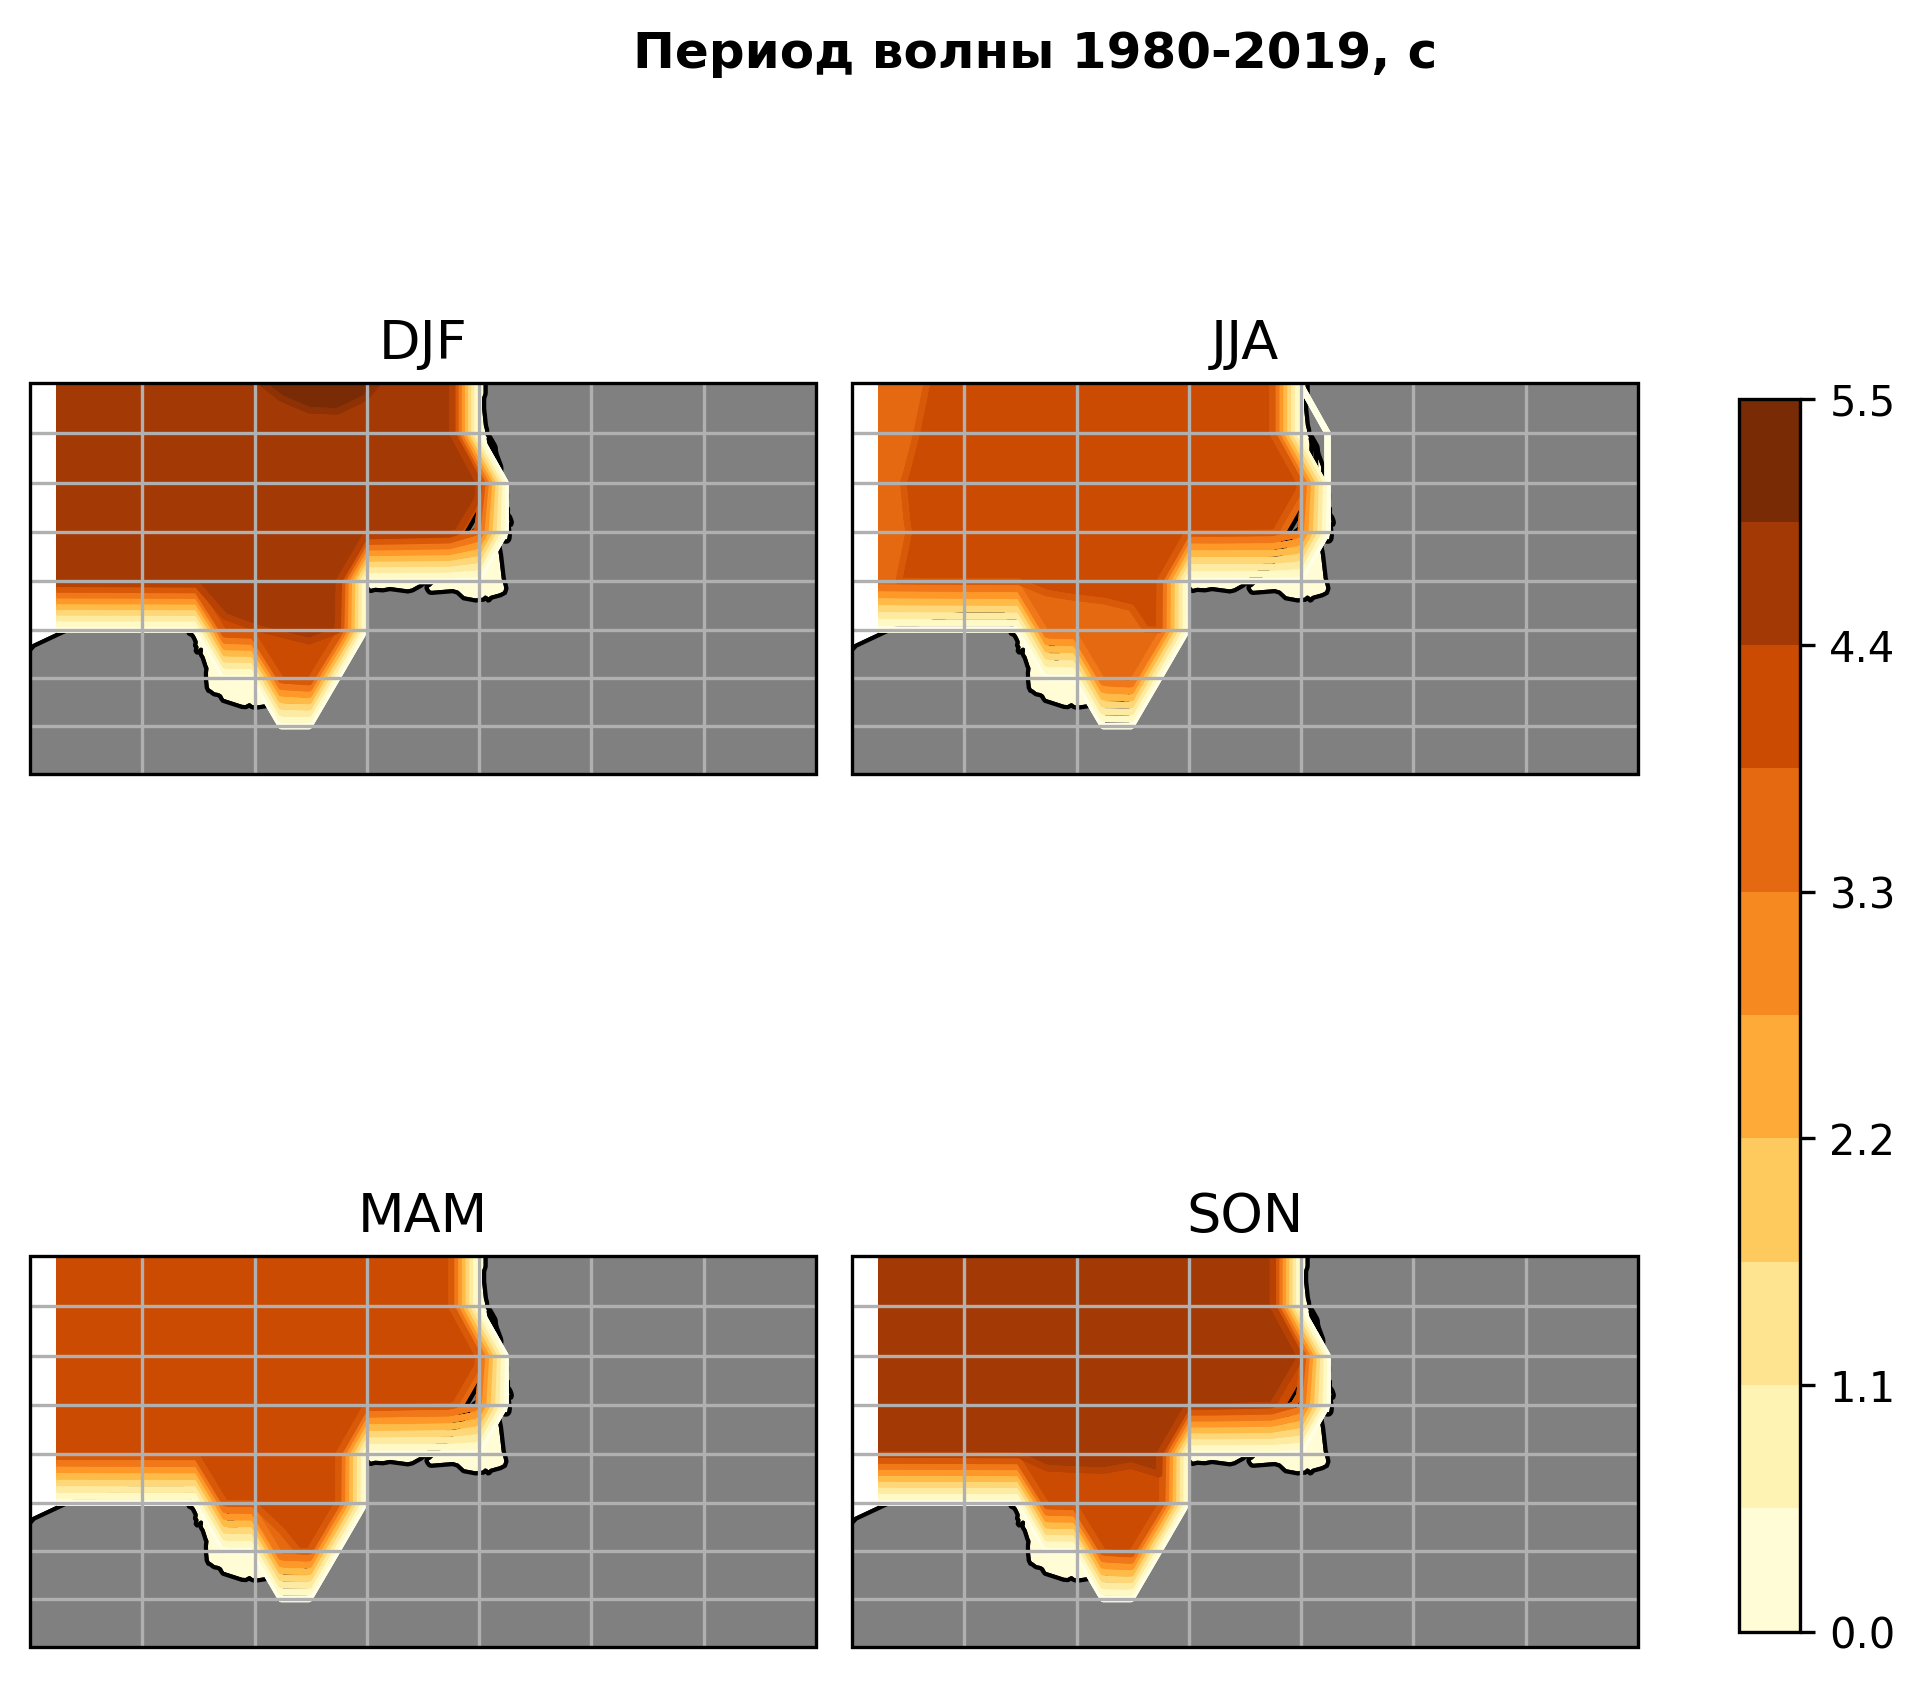

In [15]:
%%time

contour_levels = np.linspace(0., 5.5, 11)
# contour_levels_miz_015 = [0.15]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7), dpi=300,
                         subplot_kw={'projection': ccrs.Mercator()})

fig.subplots_adjust(hspace = .001, wspace=.05)

for i,ax in enumerate(axes.flatten()):
    #print(ax)
    ax.set_extent([17,24,54,56],crs=ccrs.PlateCarree())
    ax.coastlines()#resolution='110m',linewidth=0.5)
    ax.gridlines()
    ax.add_feature(cfeature.LAND, facecolor='grey', edgecolor='k',zorder=2)
#     ax.set_boundary(circle, transform=ax.transAxes)
    
    h = ax.contourf(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                    ds_bal_season.t0m1.isel(season=i), contour_levels, cmap='YlOrBr', add_colorbar=False, transform=ccrs.PlateCarree())

    h015 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                      ds_bal_season.t0m1.isel(season=i), contour_levels, cmap='YlOrBr', add_colorbar=False, transform=ccrs.PlateCarree())
    h08 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values, 
                      ds_bal_season.t0m1.isel(season=i), contour_levels, cmap='YlOrBr', add_colorbar=False, transform=ccrs.PlateCarree())

    h05 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                    ds_bal_season.t0m1.isel(season=i), contour_levels, cmap='YlOrBr', add_colorbar=False, transform=ccrs.PlateCarree())



    
    ax.set_title(ds_bal_season.season.values[i], fontsize=13)

fig.tight_layout()
fig.subplots_adjust(top=1)
fig.suptitle('Период волны 1980-2019, с', fontweight = 'bold')    
fig.colorbar(h, ax=axes.ravel().tolist(), shrink = 0.6)
    
#YlOrBr

# Estimate wave energy using hs instead $H_s$ and t0m1 instead T

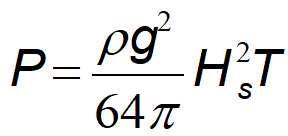

In [16]:
# Input constants for wave energy flux equation
# ro [kg/m^3]
ro = 1025 
# g [m/s^2]
g = 9.8067
print(np.pi)
# hs [m]
# T [s]
# P [KW/m]

3.141592653589793


In [17]:
p = ((ro * g**2) / (64 * np.pi)) * (ds_bal_season.hs) **2 * (ds_bal_season.t0m1)
print(p)

<xarray.DataArray (season: 4, latitude: 9, longitude: 28)>
array([[[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        ...,
        [4495.30131555, 4584.93779398, 4705.11425841, ...,
            0.        ,    0.        ,    0.        ],
        [4448.69651293, 4589.53859619, 4838.82566459, ...,
            0.        ,    0.        ,    0.        ],
        [4316.8948899 , 4526.3461118 , 4747.4909365 , ...,
            0.        ,    0.        ,    0.        ]],

       [[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.

In [18]:
p.max()

<xarray.DataArray ()>
array(5487.37351826)

CPU times: user 247 ms, sys: 22.1 ms, total: 269 ms
Wall time: 243 ms


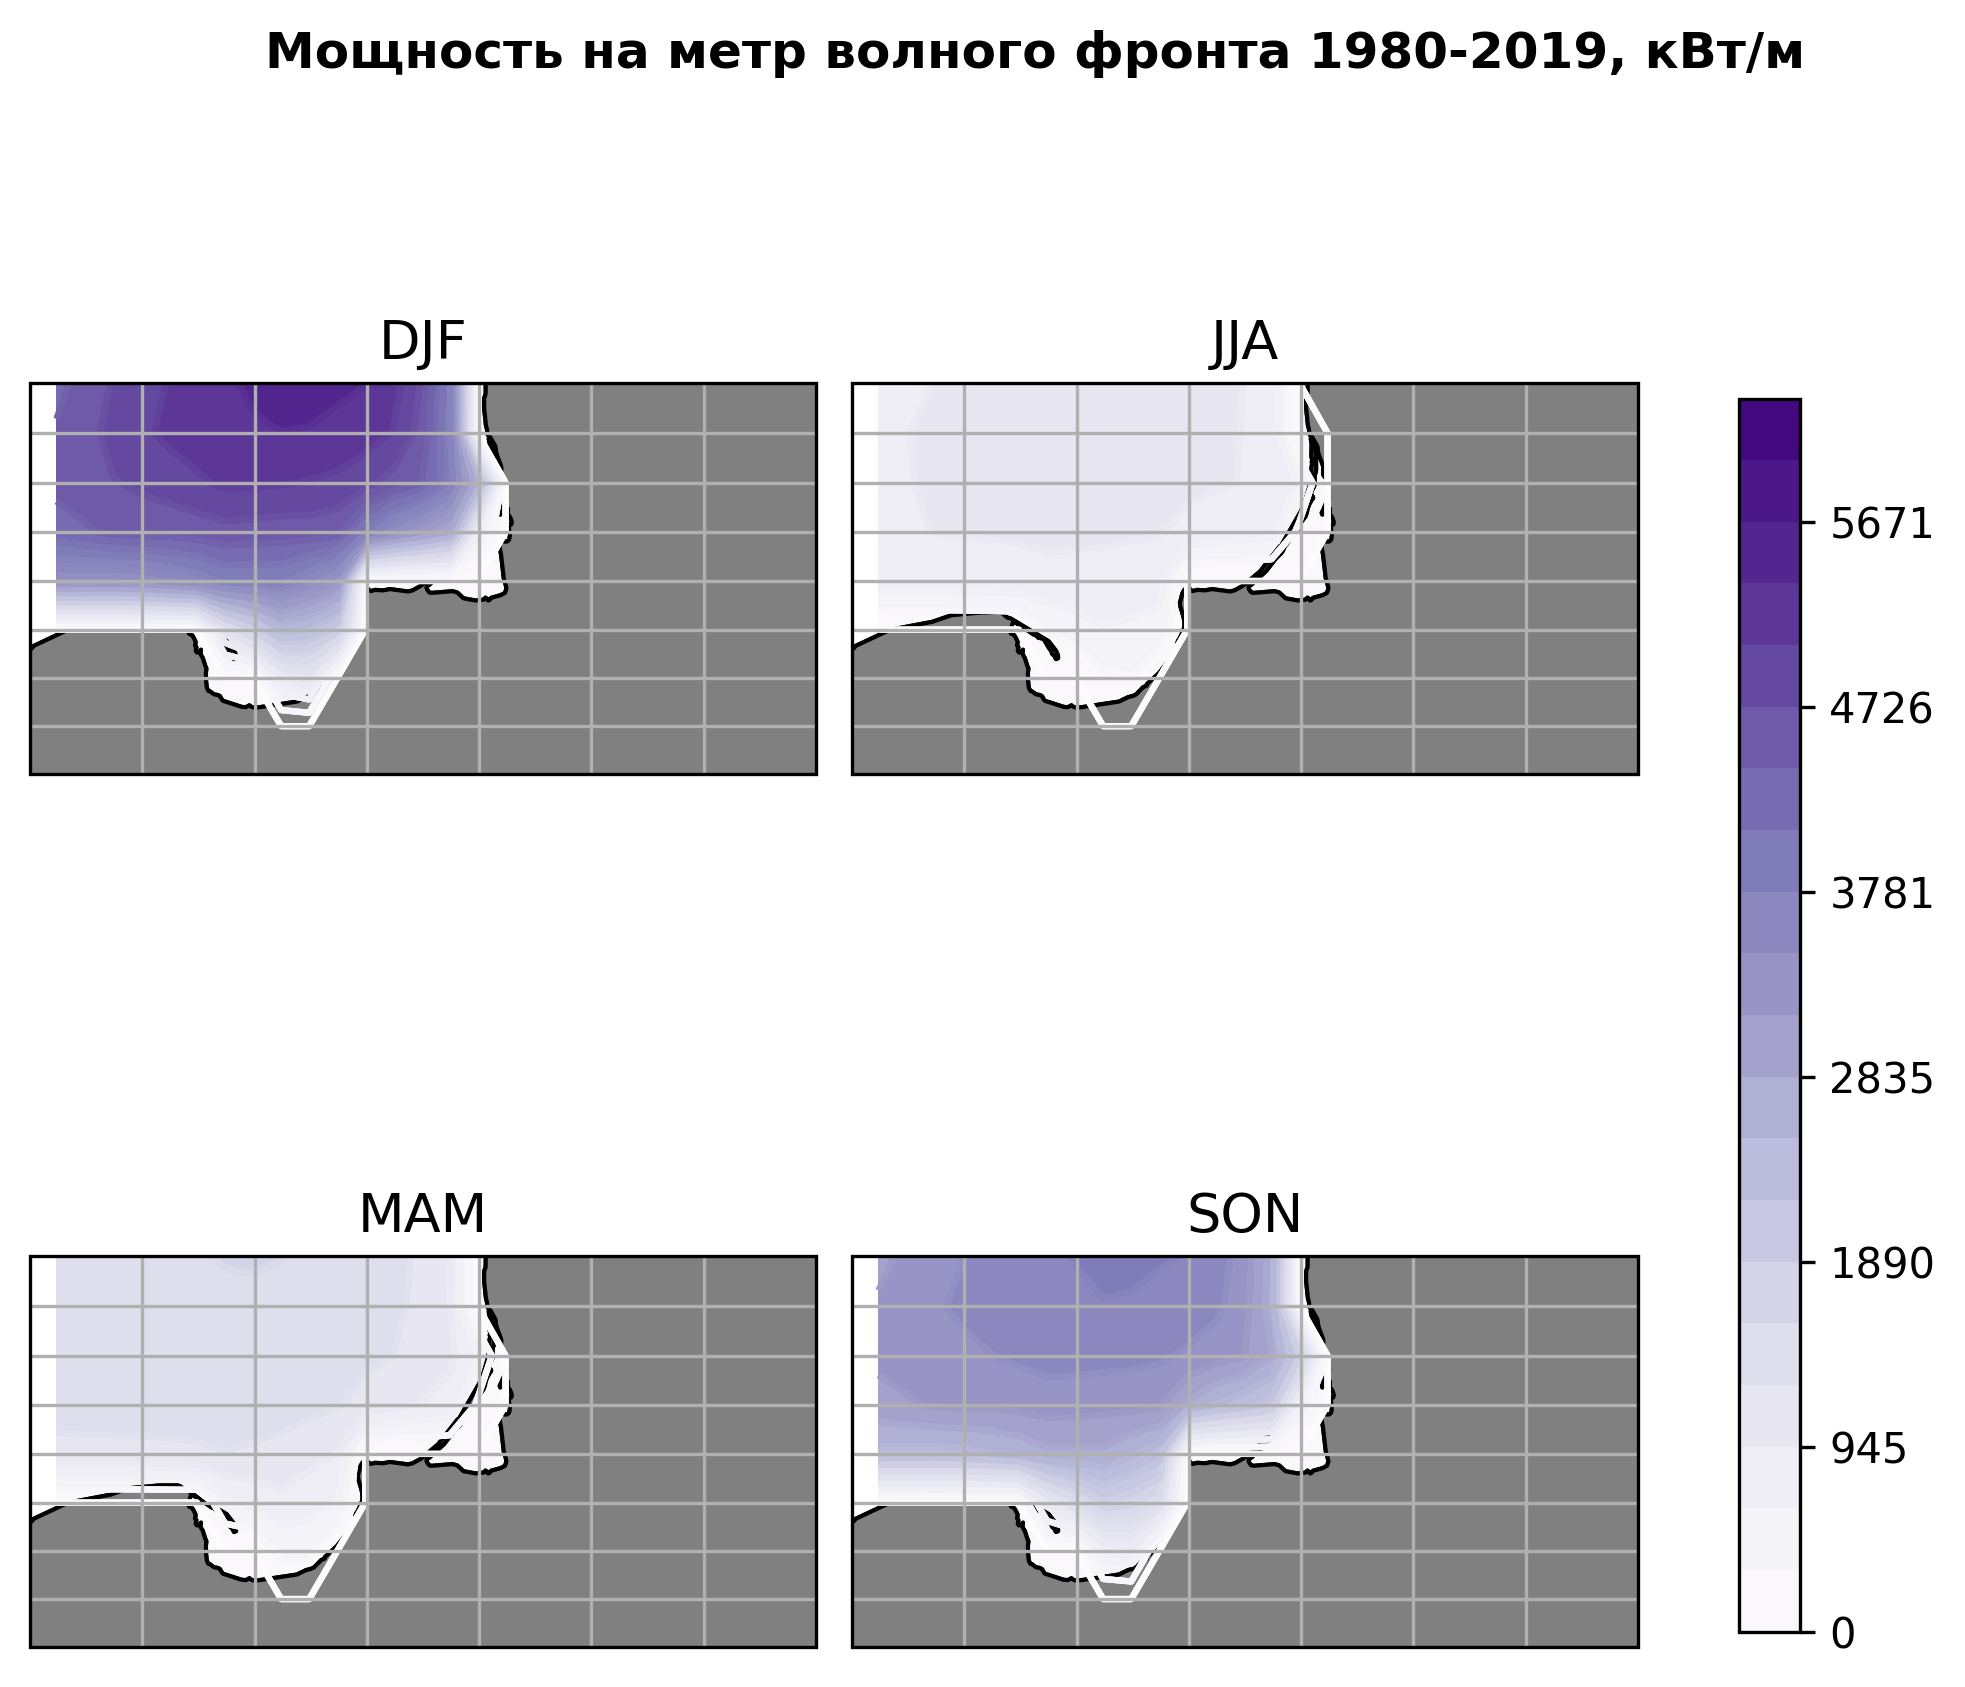

In [19]:
%%time

contour_levels = np.linspace(0.,6301, 21)
# contour_levels_miz_015 = [0.15]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7), dpi=300,
                         subplot_kw={'projection': ccrs.Mercator()})

fig.subplots_adjust(hspace = .001, wspace=.05)

for i,ax in enumerate(axes.flatten()):
    #print(ax)
    ax.set_extent([17,24,54,56],crs=ccrs.PlateCarree())
    ax.coastlines()#resolution='110m',linewidth=0.5)
    ax.gridlines()
    ax.add_feature(cfeature.LAND, facecolor='grey', edgecolor='k',zorder=2)
#     ax.set_boundary(circle, transform=ax.transAxes)
    
    h = ax.contourf(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                    p.isel(season=i), contour_levels, cmap='Purples', add_colorbar=False, transform=ccrs.PlateCarree())

    h015 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                      p.isel(season=i), contour_levels, cmap='Purples', add_colorbar=False, transform=ccrs.PlateCarree())
    h08 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values, 
                      p.isel(season=i), contour_levels, cmap='Purples', add_colorbar=False, transform=ccrs.PlateCarree())

    h05 = ax.contour(ds_bal_season.coords['longitude'].values, ds_bal_season.coords['latitude'].values,
                    p.isel(season=i), contour_levels, cmap='Purples', add_colorbar=False, transform=ccrs.PlateCarree())



    
    ax.set_title(ds_bal_season.season.values[i], fontsize=13)

fig.tight_layout()
fig.subplots_adjust(top=1)
fig.suptitle('Мощность на метр волного фронта 1980-2019, кВт/м', fontweight = 'bold')    
fig.colorbar(h, ax=axes.ravel().tolist(), shrink = 0.6)
    
#plt.cm.Purples

In [20]:
print(ds_bal.coords['longitude'].values[2], ds_bal.coords['latitude'].values[5] , ds_bal.time.values)
print('\n')
print(ds_bal_season.coords['latitude'].values)

17.737717 55.25 ['1980-01-01T00:00:00.000000000' '1980-01-01T06:00:00.000000000'
 '1980-01-01T12:00:00.000000000' ... '2019-12-31T06:00:00.000000000'
 '2019-12-31T12:00:00.000000000' '2019-12-31T18:00:00.000000000']


[54.   54.25 54.5  54.75 55.   55.25 55.5  55.75 56.  ]


In [21]:
print(ds_bal.values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (time: 58440, longitude: 28, latitude: 9)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 ... 2019-12-31T18:00:00
  * longitude  (longitude) float32 17.24 17.49 17.74 17.99 ... 23.48 23.73 23.98
  * latitude   (latitude) float32 54.0 54.25 54.5 54.75 ... 55.5 55.75 56.0
Data variables:
    MAPSTA     (latitude, longitude) int16 ...
    hs         (time, latitude, longitude) float32 ...
    t0m1       (time, latitude, longitude) float32 ...
Attributes: (12/21)
    CDI:                           Climate Data Interface version 1.9.8 (http...
    Conventions:                   CF-1.6
    history:                       Mon Feb 05 07:46:44 2024: cdo mergetime ba...
    WAVEWATCH_III_version_number:  5.16
    WAVEWATCH_III_switches:        F90 NOGRB NOPA TRKNC LRB4 DIST MPI RWND IO...
    product_name:                  ww3.1980_t0m1.nc
    ...                            ...
    altitude_resolution:           n/a
    

In [22]:
# print(ds_bal[:][2][5])
print(len(ds_bal.isel(longitude=2, latitude=5).hs.values))
print(len(ds_bal.isel(longitude=2, latitude=5).t0m1.values))


58440
58440


In [23]:
p_point = ((ro * g**2) / (64 * np.pi)) * (ds_bal.isel(longitude=2, latitude=5).hs.values) **2 * (ds_bal.isel(longitude=2, latitude=5).t0m1.values)
print(len(p_point))


58440


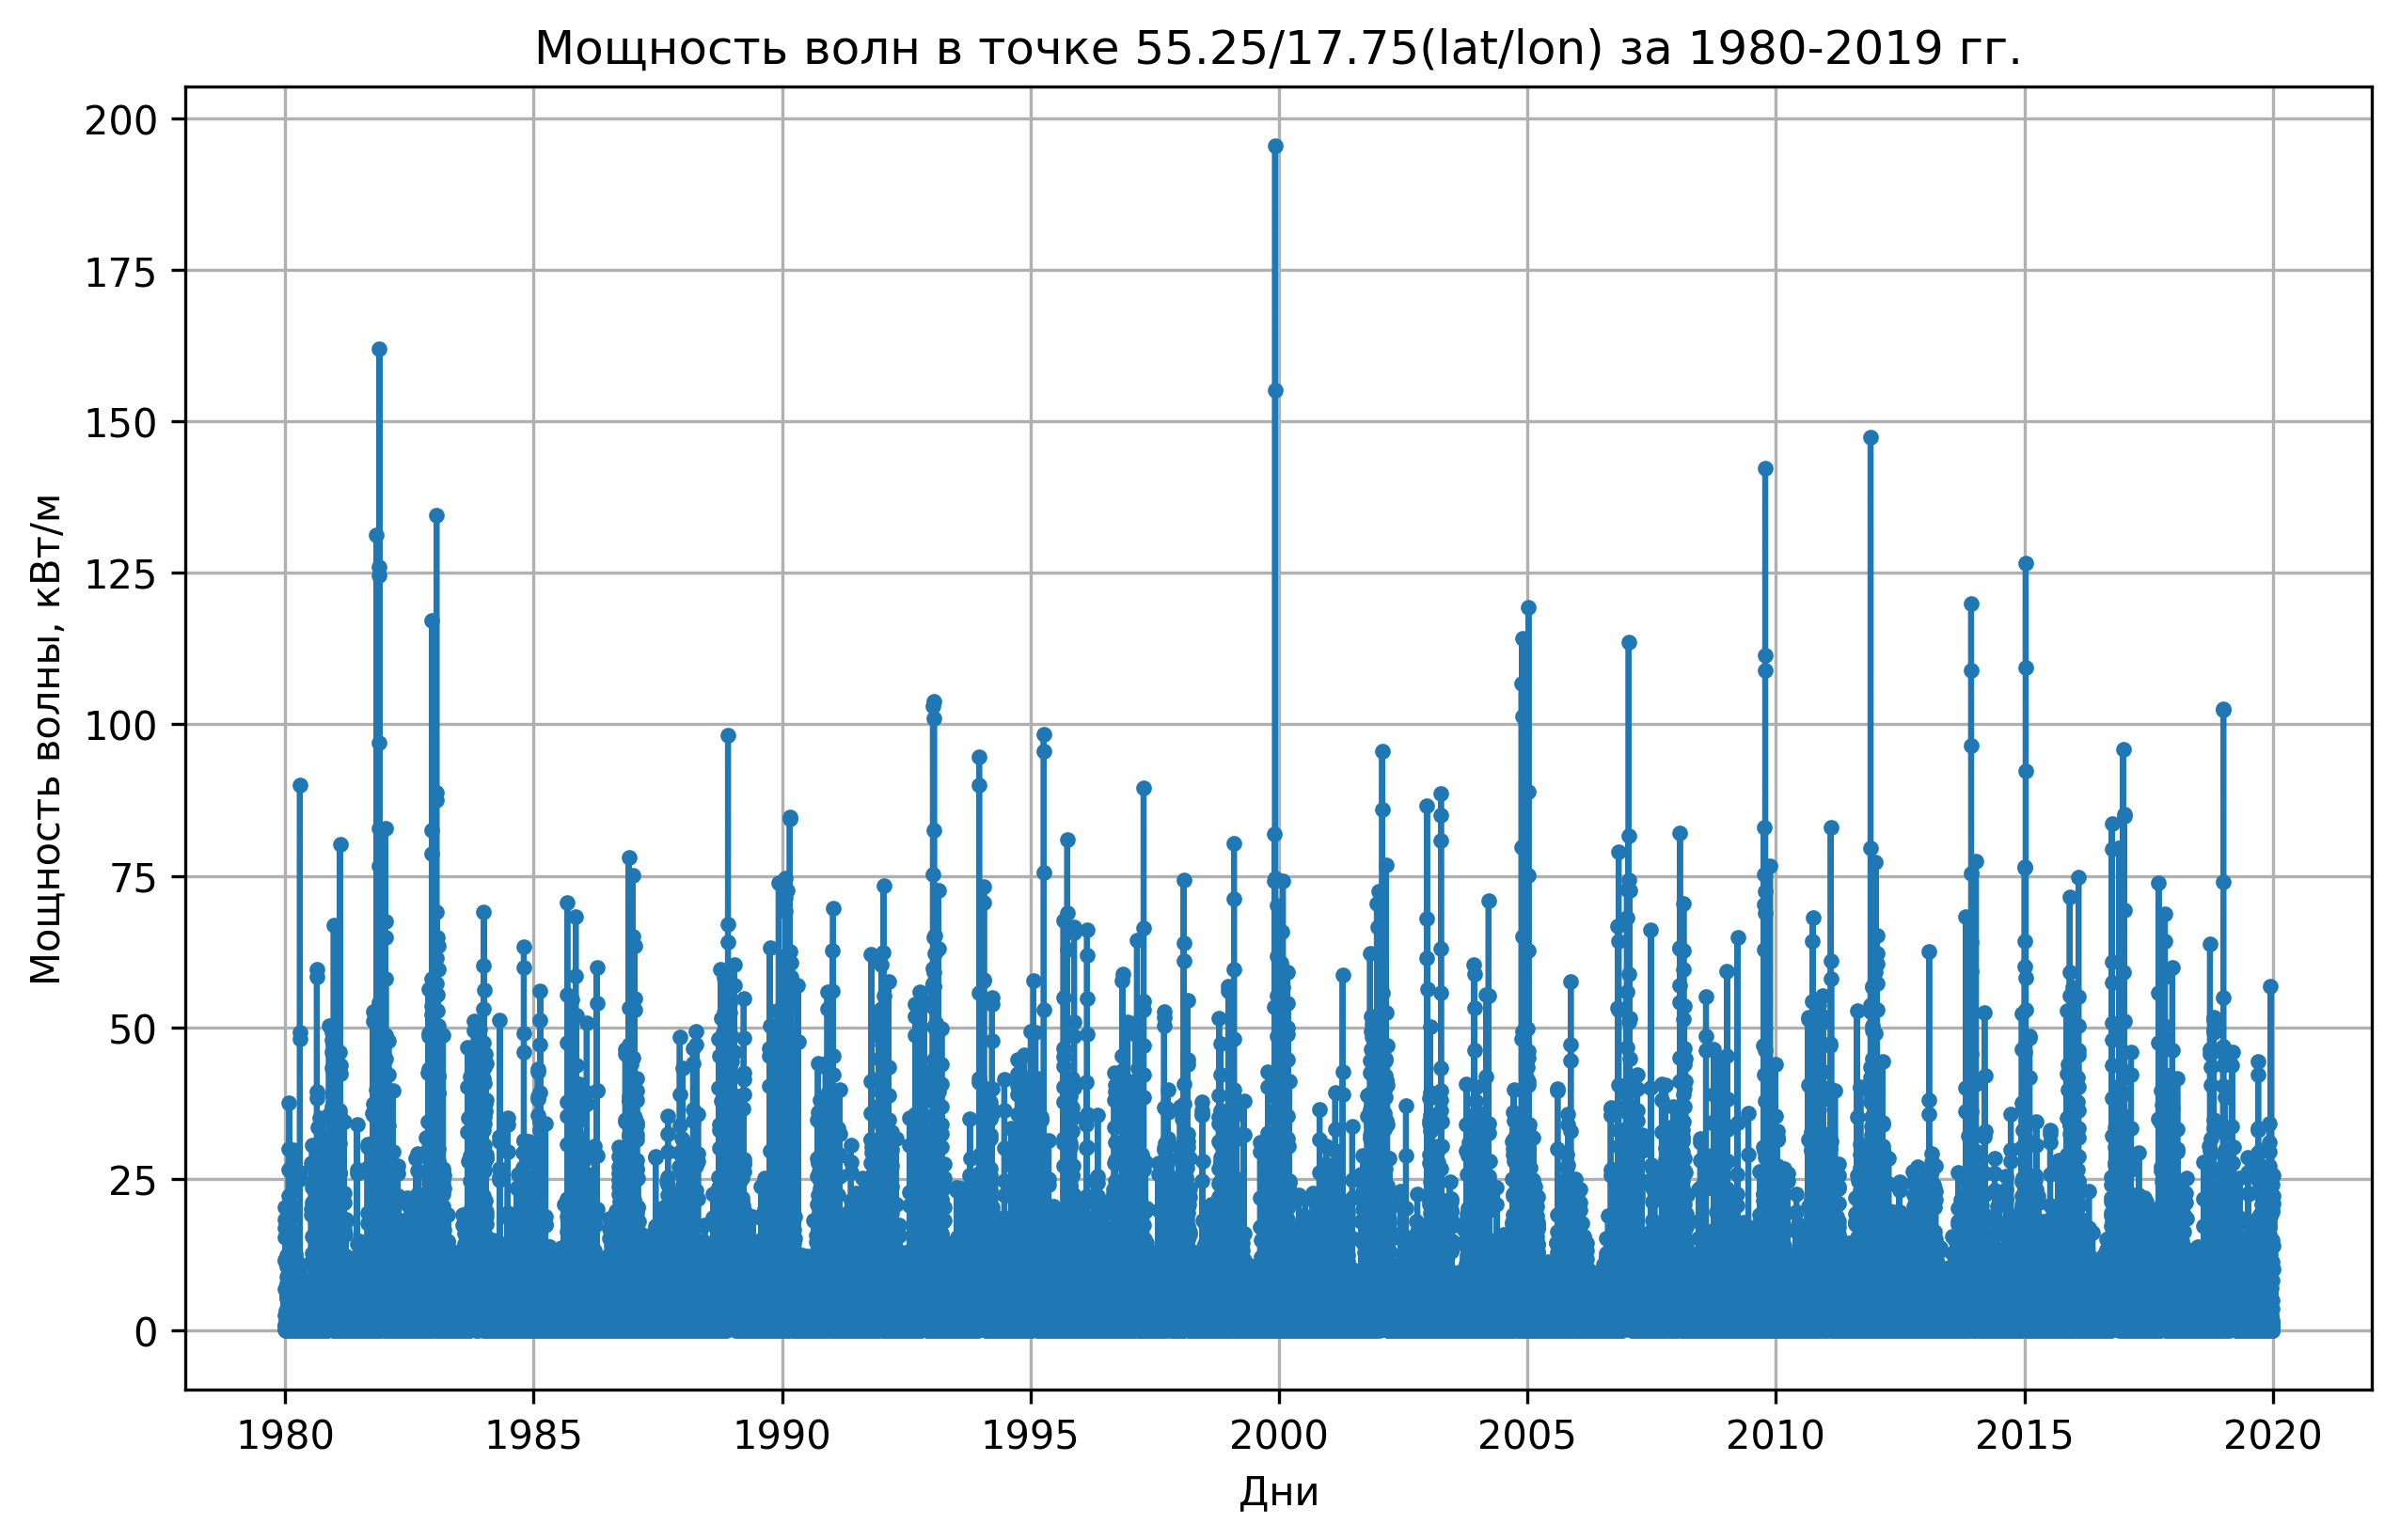

In [24]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(ds_bal.time.values, p_point/1000, marker='.', linestyle='-')
plt.xlabel('Дни')
plt.ylabel('Мощность волны, кВт/м')
plt.title('Мощность волн в точке 55.25/17.75(lat/lon) за 1980-2019 гг.')
# plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
# plt.legend([f'Средняя мощность P = {np.mean(p_point/1000):.2f} кВт/м'])
plt.grid(True)
plt.show()

In [25]:
ds_bal.time.values

array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', ...,
       '2019-12-31T06:00:00.000000000', '2019-12-31T12:00:00.000000000',
       '2019-12-31T18:00:00.000000000'], dtype='datetime64[ns]')

In [26]:
# indices = np.where(p_point == nan)
# print(indices)
print(str(np.mean(p_point)))
print(str(type(p_point)))
mean_values_column = np.mean(p_point, axis=0)
print(mean_values_column)

nan
<class 'numpy.ndarray'>
nan


In [27]:
# for i in range(19879898):
#     print(ds_bal.hs[i][5][2].values)


# print(ds_bal.hs[:][28][8].values)

# Yearly Climatology

In [28]:
%%time
ds_bal_anl = ds_bal.groupby('time.year').mean('time')

CPU times: user 258 ms, sys: 57.8 ms, total: 316 ms
Wall time: 322 ms


In [29]:
ds_bal_anl

<xarray.Dataset>
Dimensions:    (longitude: 28, latitude: 9, year: 40)
Coordinates:
  * longitude  (longitude) float32 17.24 17.49 17.74 17.99 ... 23.48 23.73 23.98
  * latitude   (latitude) float32 54.0 54.25 54.5 54.75 ... 55.5 55.75 56.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2016 2017 2018 2019
Data variables:
    MAPSTA     (year, latitude, longitude) int16 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    hs         (year, latitude, longitude) float32 nan nan nan ... nan nan nan
    t0m1       (year, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes: (12/21)
    CDI:                           Climate Data Interface version 1.9.8 (http...
    Conventions:                   CF-1.6
    history:                       Mon Feb 05 07:46:44 2024: cdo mergetime ba...
    WAVEWATCH_III_version_number:  5.16
    WAVEWATCH_III_switches:        F90 NOGRB NOPA TRKNC LRB4 DIST MPI RWND IO...
    product_name:                  ww3.1980_t0m1.nc
    ...                            ...
    altitude_resolution:           n/a
    start_date:                    1980-01-01 00:00:00
    stop_date:                     1980-12-31 18:00:00
    history_of_appended_files:     Tue Jan 30 18:17:20 2024: Appended file ba...
    NCO:                           "4.6.3"
    CDO:                           Climate Data Operators version 1.9.8 (http...

Text(0.0, 1.0, 'Зависимость средней высоты волн $H_{s}$ и периода 1980-2019')

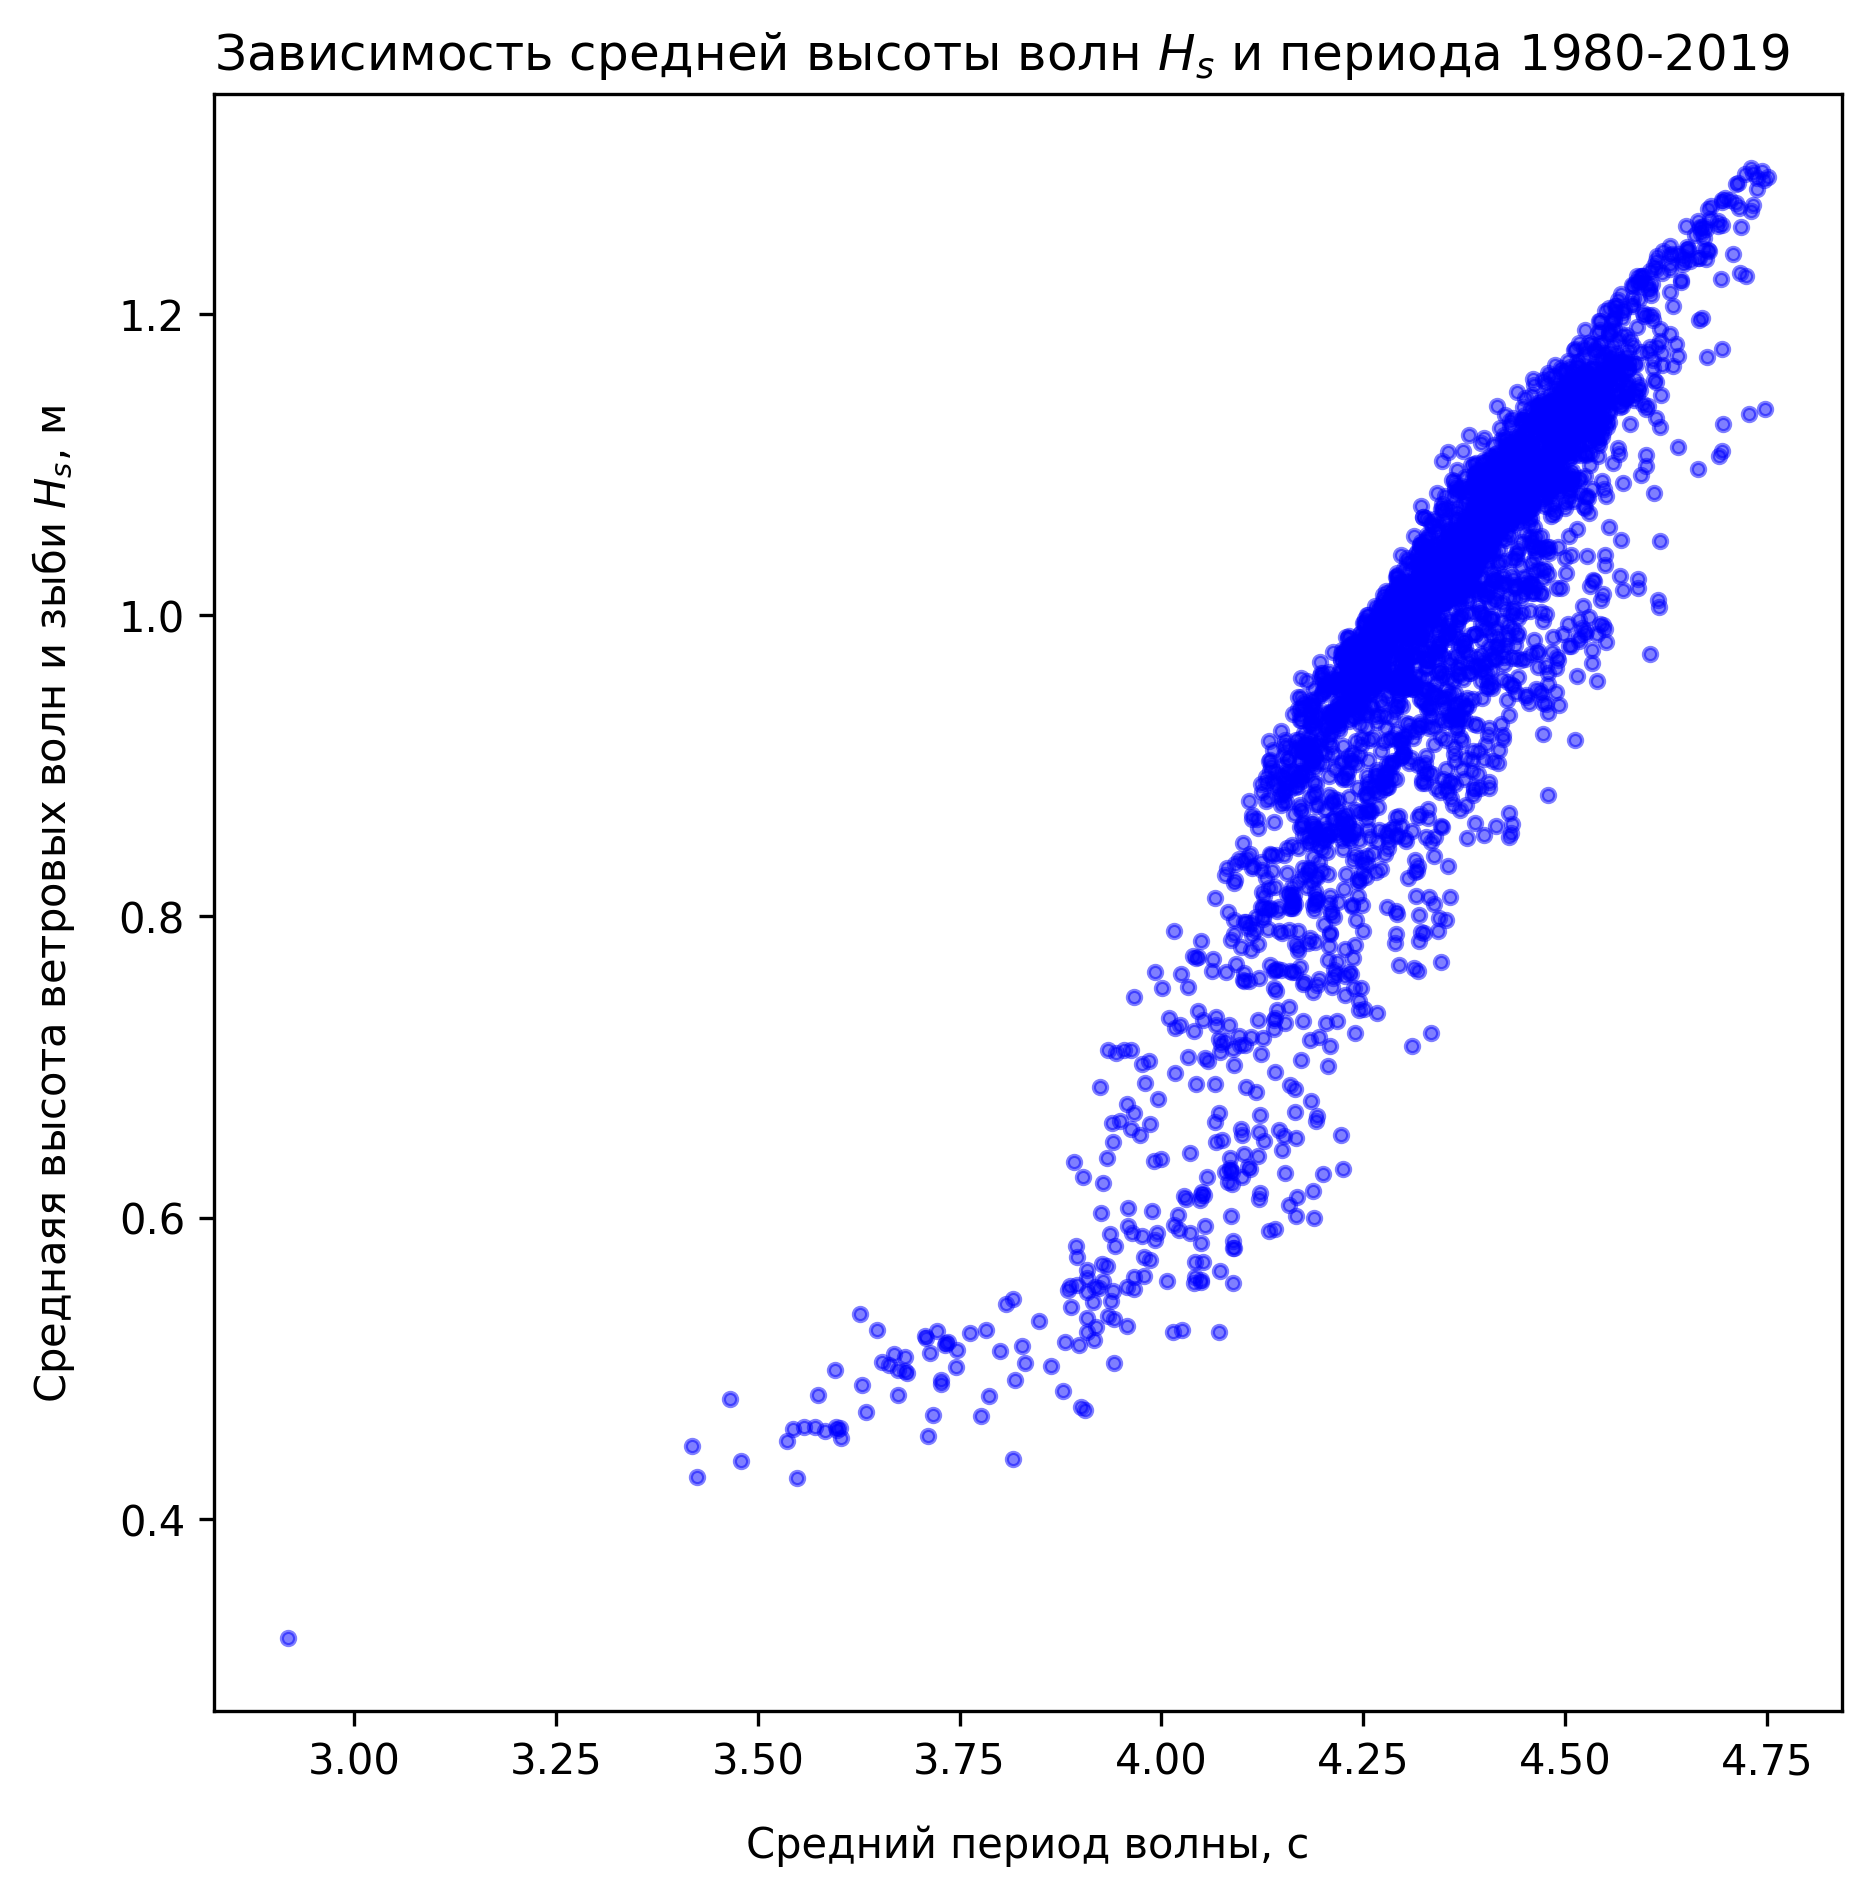

In [30]:
fig, axes = plt.subplots(figsize=(7,7), dpi=300)

ds_bal_anl.plot.scatter(x="t0m1", y="hs", marker='o', color='b', s=10, alpha=0.5)
axes.set_xlabel('Средний период волны, с',labelpad=10,fontstretch= 'condensed')
axes.set_ylabel('Среднаяя высота ветровых волн и зыби $H_{s}$, м',labelpad=10,fontstretch= 'condensed')
plt.title('Зависимость средней высоты волн $H_{s}$ и периода 1980-2019',loc='left')


Text(0.0, 1.0, 'Средняя высота волн в зависимости от года 1980-2019')

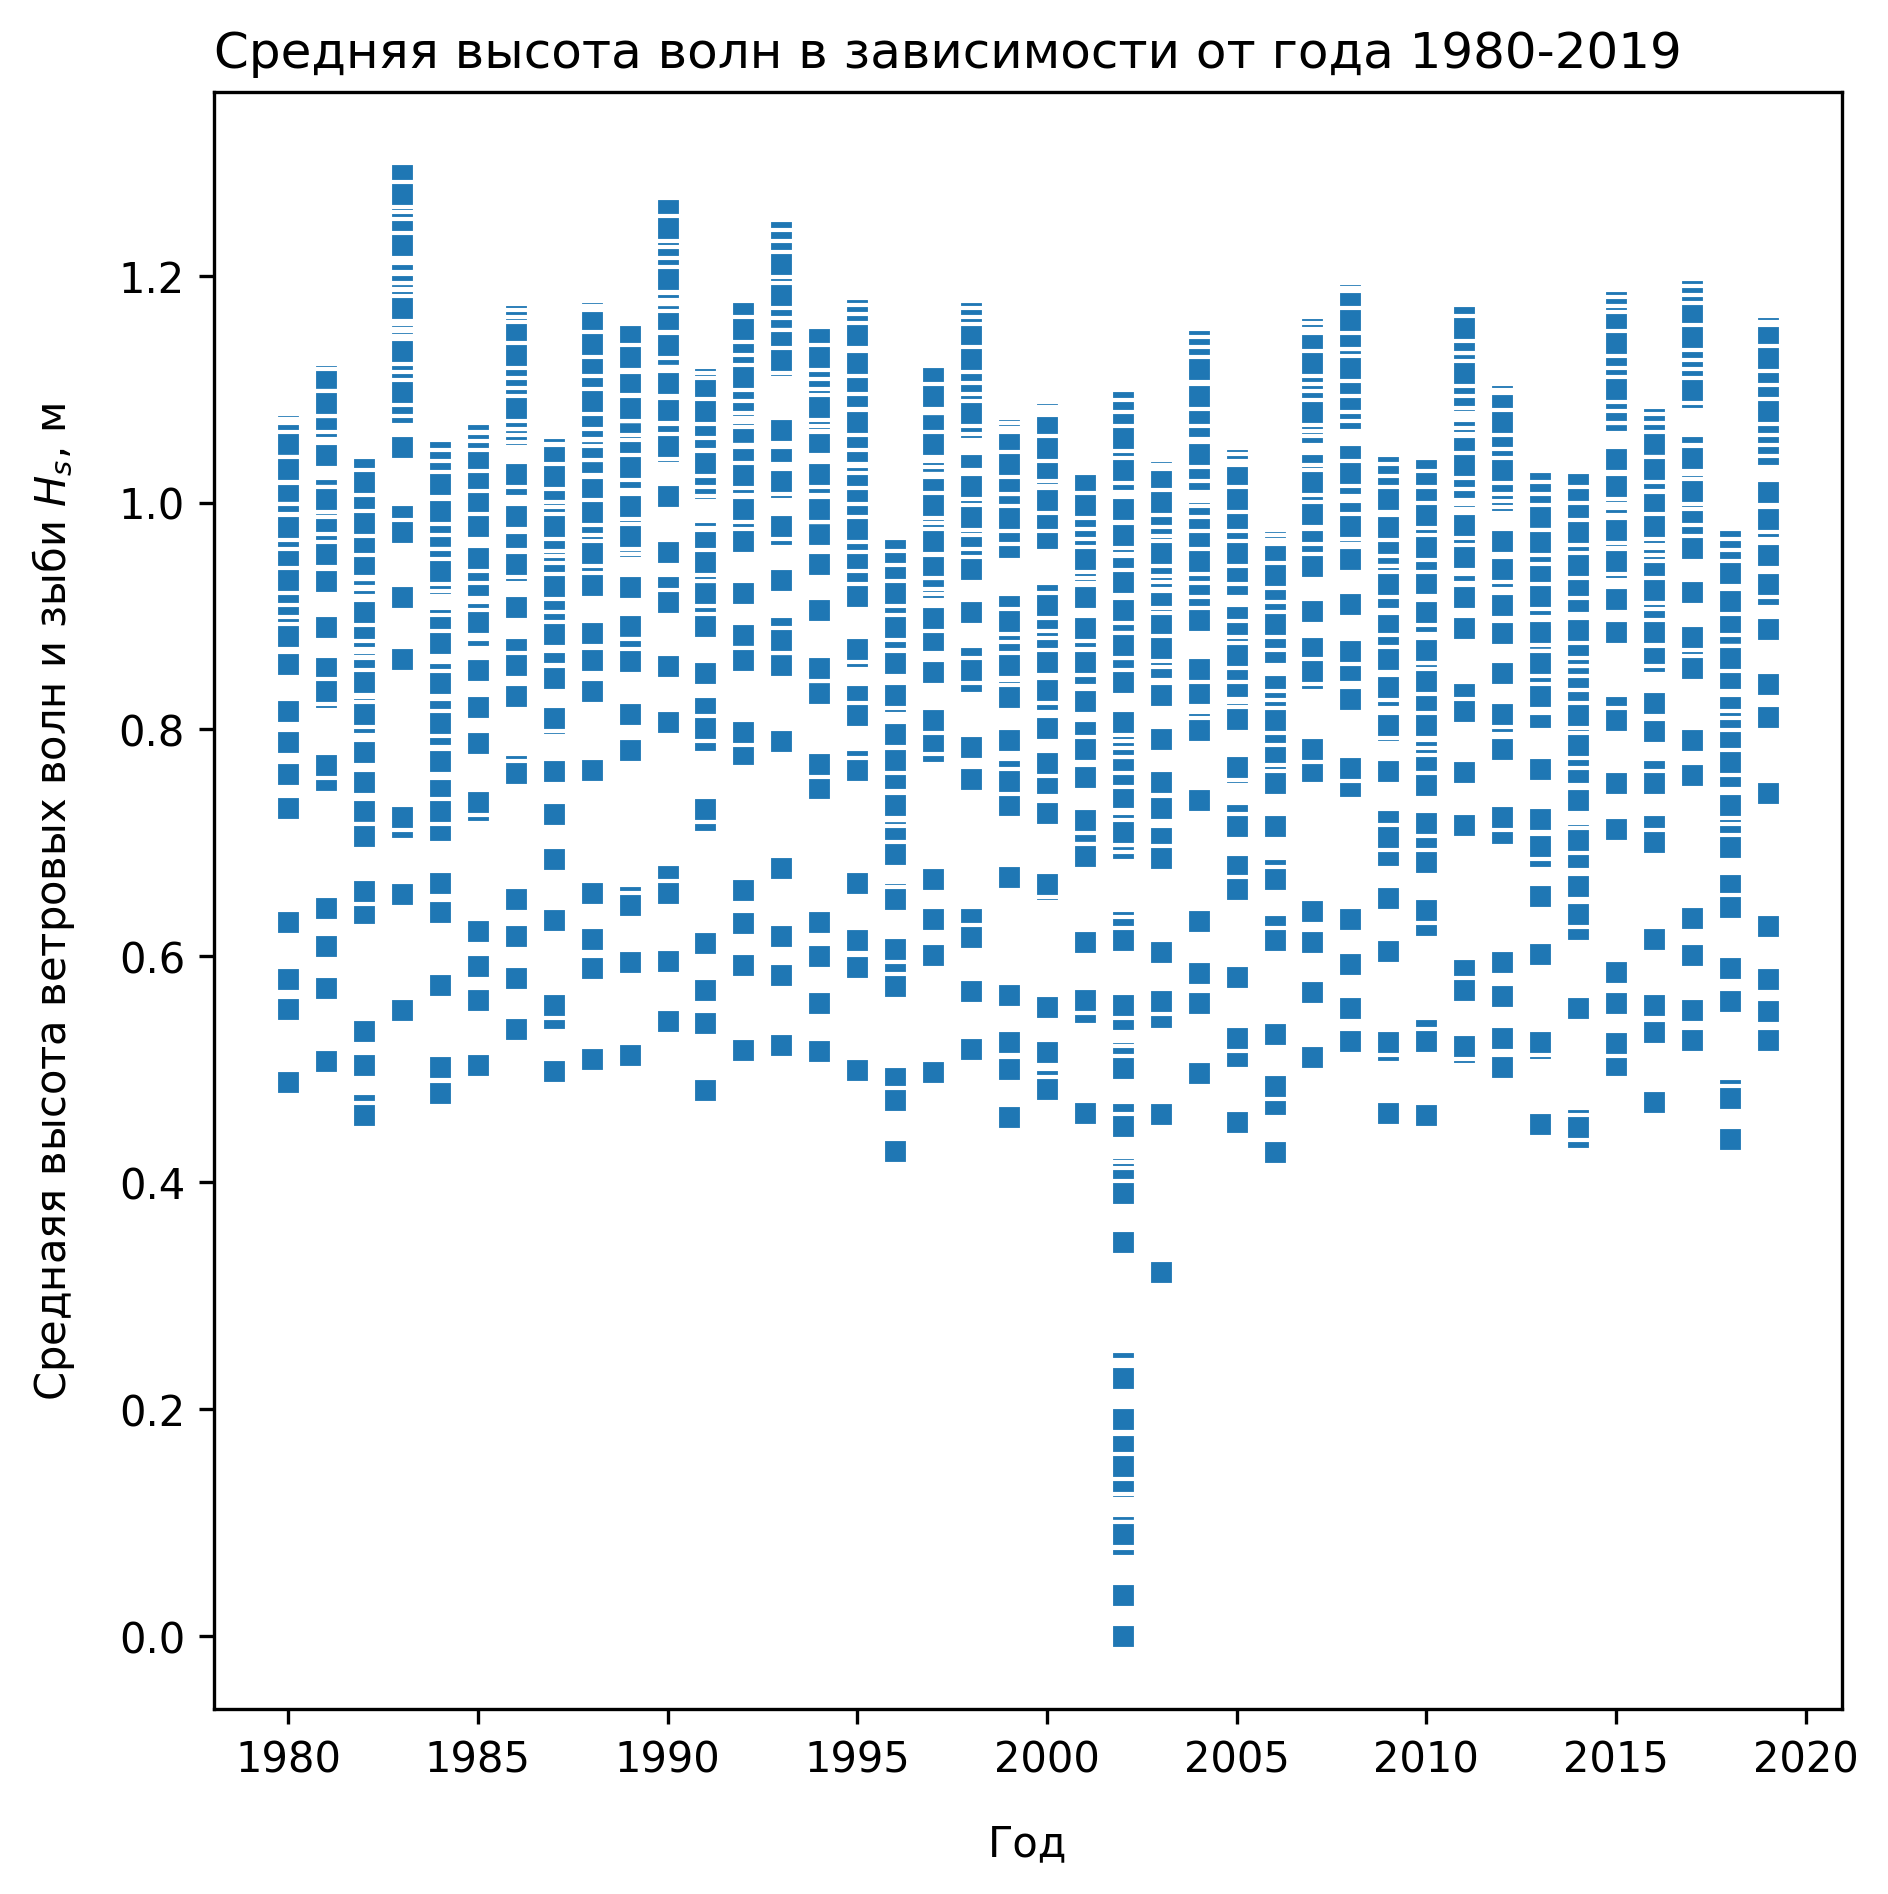

In [31]:
fig, axes = plt.subplots(figsize=(7,7), dpi=300)
ds_bal_anl.plot.scatter(x="year", y="hs", marker='s')
axes.set_xlabel('Год',labelpad=10,fontstretch= 'condensed')
axes.set_ylabel('Среднаяя высота ветровых волн и зыби $H_{s}$, м',labelpad=10,fontstretch= 'condensed')
plt.title('Средняя высота волн в зависимости от года 1980-2019',loc='left')

In [32]:
for i in range(len(ds_bal.time)//4):
    print(ds_bal.time[i])
    i+=4

<xarray.DataArray 'time' ()>
array('1980-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1980-01-01
Attributes:
    standard_name:  time
    long_name:      julian day (UT)
    axis:           T
<xarray.DataArray 'time' ()>
array('1980-01-01T06:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1980-01-01T06:00:00
Attributes:
    standard_name:  time
    long_name:      julian day (UT)
    axis:           T
<xarray.DataArray 'time' ()>
array('1980-01-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1980-01-01T12:00:00
Attributes:
    standard_name:  time
    long_name:      julian day (UT)
    axis:           T
<xarray.DataArray 'time' ()>
array('1980-01-01T18:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1980-01-01T18:00:00
Attributes:
    standard_name:  time
    long_name:      julian day (UT)
    axis:           T
<xarray.DataArray

In [33]:
len(ds_bal.time)//4

14610

In [35]:
yo = 4
print(str(ds_bal.time.values[yo]), ds_bal.time.values[yo])

1980-01-02T00:00:00.000000000 1980-01-02T00:00:00.000000000


In [36]:
yo2 = 4
print(str(ds_bal_wind.time.values[yo]), int(ds_bal_wind.time.values[yo]))

4.0 4
